In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

# Nayes Baives

In [2]:
# Step 2: Prepare the Data
file_path = 'Dataset salary 2024.csv'
df = pd.read_csv(file_path)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['employment_type', 'job_title', 'salary_currency', 
                       'employee_residence', 'company_location', 'company_size']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop(['experience_level'], axis=1)
y = df['experience_level']

In [4]:
#display X
X

,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,2,2,202730,21,202730,84,0,74,1
1,2024,2,2,92118,21,92118,84,0,74,1
2,2024,2,57,130500,21,130500,84,0,74,1
3,2024,2,57,96000,21,96000,84,0,74,1
4,2024,2,120,190000,21,190000,84,0,74,1
...,...,...,...,...,...,...,...,...,...,...
16529,2020,2,90,412000,21,412000,84,100,74,0
16530,2021,2,140,151000,21,151000,84,100,74,0
16531,2020,2,90,105000,21,105000,84,100,74,2
16532,2020,0,28,100000,21,100000,84,100,74,0


In [5]:
#display Y
y

0        SE
1        SE
2        SE
3        SE
4        SE
         ..
16529    SE
16530    MI
16531    EN
16532    EN
16533    SE
Name: experience_level, Length: 16534, dtype: object

In [6]:
# Encode the target variable
le_exp = LabelEncoder()
y = le_exp.fit_transform(y)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and Train the Naive Bayes Model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = nb_classifier.predict(X_test)

# Step 6: Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le_exp.classes_)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6186876322951316
Classification Report:
              precision    recall  f1-score   support

          EN       0.14      0.16      0.15       255
          EX       0.00      0.00      0.00       104
          MI       0.27      0.02      0.03       780
          SE       0.67      0.92      0.78      2168

    accuracy                           0.62      3307
   macro avg       0.27      0.27      0.24      3307
weighted avg       0.52      0.62      0.53      3307



# KNN

In [7]:
# KNN

# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Prepare the Data
file_path = 'Dataset salary 2024.csv'
df = pd.read_csv(file_path)

# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['employment_type', 'job_title', 'salary_currency', 
                       'employee_residence', 'company_location', 'company_size']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop(['experience_level'], axis=1)
y = df['experience_level']

# Encode the target variable
le_exp = LabelEncoder()
y = le_exp.fit_transform(y)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate KNN model
def train_evaluate_knn(k):
    # Step 4: Create and Train the KNN Model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Step 5: Make Predictions
    y_pred = knn.predict(X_test)

    # Step 6: Evaluate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le_exp.classes_)
    
    print(f'Accuracy for k={k}: {accuracy}')
    print(f'Classification Report for k={k}:')
    print(report)

# Train and evaluate KNN model for k=7 and k=11
train_evaluate_knn(7)
train_evaluate_knn(11)

Accuracy for k=7: 0.659510130027215
Classification Report for k=7:
              precision    recall  f1-score   support

          EN       0.37      0.31      0.34       255
          EX       0.34      0.12      0.18       104
          MI       0.43      0.36      0.39       780
          SE       0.75      0.84      0.79      2168

    accuracy                           0.66      3307
   macro avg       0.47      0.41      0.43      3307
weighted avg       0.63      0.66      0.64      3307

Accuracy for k=11: 0.6676746295736317
Classification Report for k=11:
              precision    recall  f1-score   support

          EN       0.38      0.27      0.32       255
          EX       0.50      0.08      0.13       104
          MI       0.44      0.33      0.38       780
          SE       0.74      0.86      0.80      2168

    accuracy                           0.67      3307
   macro avg       0.52      0.39      0.41      3307
weighted avg       0.64      0.67      0.64     

# K-Means Cluster

In [9]:
# Step 2: Load and Prepare Data
# Load the dataset
data = pd.read_csv('Dataset salary 2024.csv')

# Display the first few rows of the dataset
print(data.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0               US            M  
1           

In [10]:
print(data.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [11]:
#Step 3: Initialize and Fit the K-Means Model
# Assuming the relevant features for clustering are in the columns 'Feature1' and 'Feature2'
# Adjust the feature names based on the actual dataset
X = data[['salary_in_usd', 'remote_ratio']].values

# Number of clusters
k = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model
kmeans.fit(X)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [12]:
#Step 4: Obtain Cluster Assignments
# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add cluster assignments to the original dataframe
data['Cluster'] = cluster_labels

# Display the first few rows with cluster assignments
print(data.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  Cluster  
0               US            M      

In [13]:
#Step 5: Interpret Results
# Counting the number of data points in each cluster
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} data points")

Cluster 0: 2405 data points
Cluster 1: 7725 data points
Cluster 2: 6404 data points


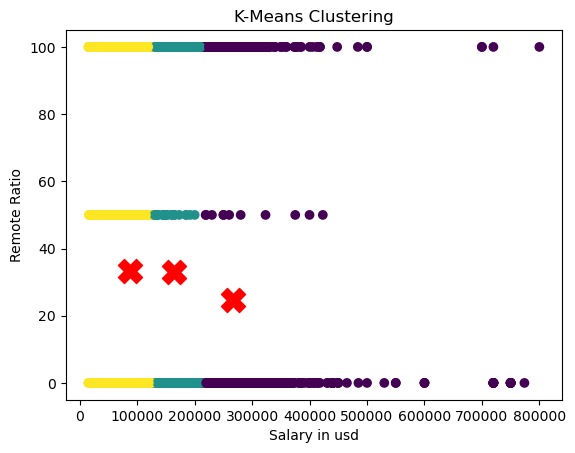

In [14]:
# Step 6: Visualize Clusters
# Scatter plot of the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel('Salary in usd')
plt.ylabel('Remote Ratio')
plt.title('K-Means Clustering')
plt.show()

# Complete Codes

In [15]:
# Naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'Dataset salary 2024.csv'
df = pd.read_csv(file_path)

# Preprocess the data
# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['employment_type', 'job_title', 'salary_currency', 
                       'employee_residence', 'company_location', 'company_size']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop(['experience_level'], axis=1)
y = df['experience_level']

# Encode the target variable
le_exp = LabelEncoder()
y = le_exp.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le_exp.classes_)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6186876322951316
Classification Report:
              precision    recall  f1-score   support

          EN       0.14      0.16      0.15       255
          EX       0.00      0.00      0.00       104
          MI       0.27      0.02      0.03       780
          SE       0.67      0.92      0.78      2168

    accuracy                           0.62      3307
   macro avg       0.27      0.27      0.24      3307
weighted avg       0.52      0.62      0.53      3307



In [16]:
# KNN

# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Prepare the Data
file_path = 'Dataset salary 2024.csv'
df = pd.read_csv(file_path)

# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['employment_type', 'job_title', 'salary_currency', 
                       'employee_residence', 'company_location', 'company_size']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop(['experience_level'], axis=1)
y = df['experience_level']

# Encode the target variable
le_exp = LabelEncoder()
y = le_exp.fit_transform(y)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate KNN model
def train_evaluate_knn(k):
    # Step 4: Create and Train the KNN Model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Step 5: Make Predictions
    y_pred = knn.predict(X_test)

    # Step 6: Evaluate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le_exp.classes_)
    
    print(f'Accuracy for k={k}: {accuracy}')
    print(f'Classification Report for k={k}:')
    print(report)

# Train and evaluate KNN model for k=7 and k=11
train_evaluate_knn(7)
train_evaluate_knn(11)

Accuracy for k=7: 0.659510130027215
Classification Report for k=7:
              precision    recall  f1-score   support

          EN       0.37      0.31      0.34       255
          EX       0.34      0.12      0.18       104
          MI       0.43      0.36      0.39       780
          SE       0.75      0.84      0.79      2168

    accuracy                           0.66      3307
   macro avg       0.47      0.41      0.43      3307
weighted avg       0.63      0.66      0.64      3307

Accuracy for k=11: 0.6676746295736317
Classification Report for k=11:
              precision    recall  f1-score   support

          EN       0.38      0.27      0.32       255
          EX       0.50      0.08      0.13       104
          MI       0.44      0.33      0.38       780
          SE       0.74      0.86      0.80      2168

    accuracy                           0.67      3307
   macro avg       0.52      0.39      0.41      3307
weighted avg       0.64      0.67      0.64     

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0               US            M  
1           

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


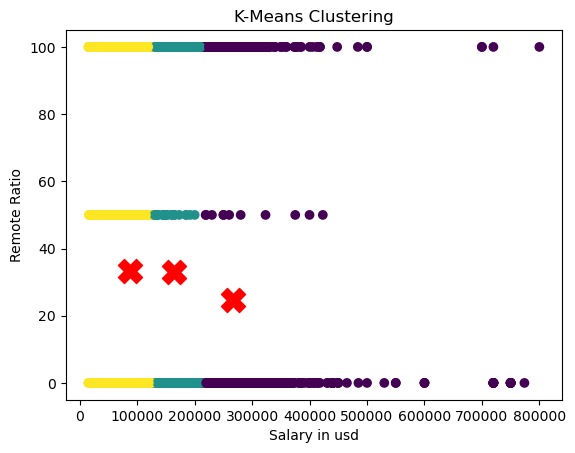

In [17]:
# K-Means
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Dataset salary 2024.csv')

# Display the first few rows of the dataset
print(data.head())

# Assuming the relevant features for clustering are in the columns 'Feature1' and 'Feature2'
# Adjust the feature names based on the actual dataset
X = data[['salary_in_usd', 'remote_ratio']].values

# Number of clusters
k = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model
kmeans.fit(X)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add cluster assignments to the original dataframe
data['Cluster'] = cluster_labels

# Display the first few rows with cluster assignments
print(data.head())

# Counting the number of data points in each cluster
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} data points")

# Scatter plot of the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel('Salary in usd')
plt.ylabel('Remote Ratio')
plt.title('K-Means Clustering')
plt.show()
